In [34]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
# 检阅数据全貌
print(train_df.columns.values)

print()

print(train_df.shape)

print()

print(test_df.shape)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

(891, 12)

(418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
# info 会展示 index 以及各列基本信息（列名、非空个数，列类型）以及各种类型个数，占用空间大小

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 确认连续数据范围，describe 只会展示那些全是数字的列
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age'>

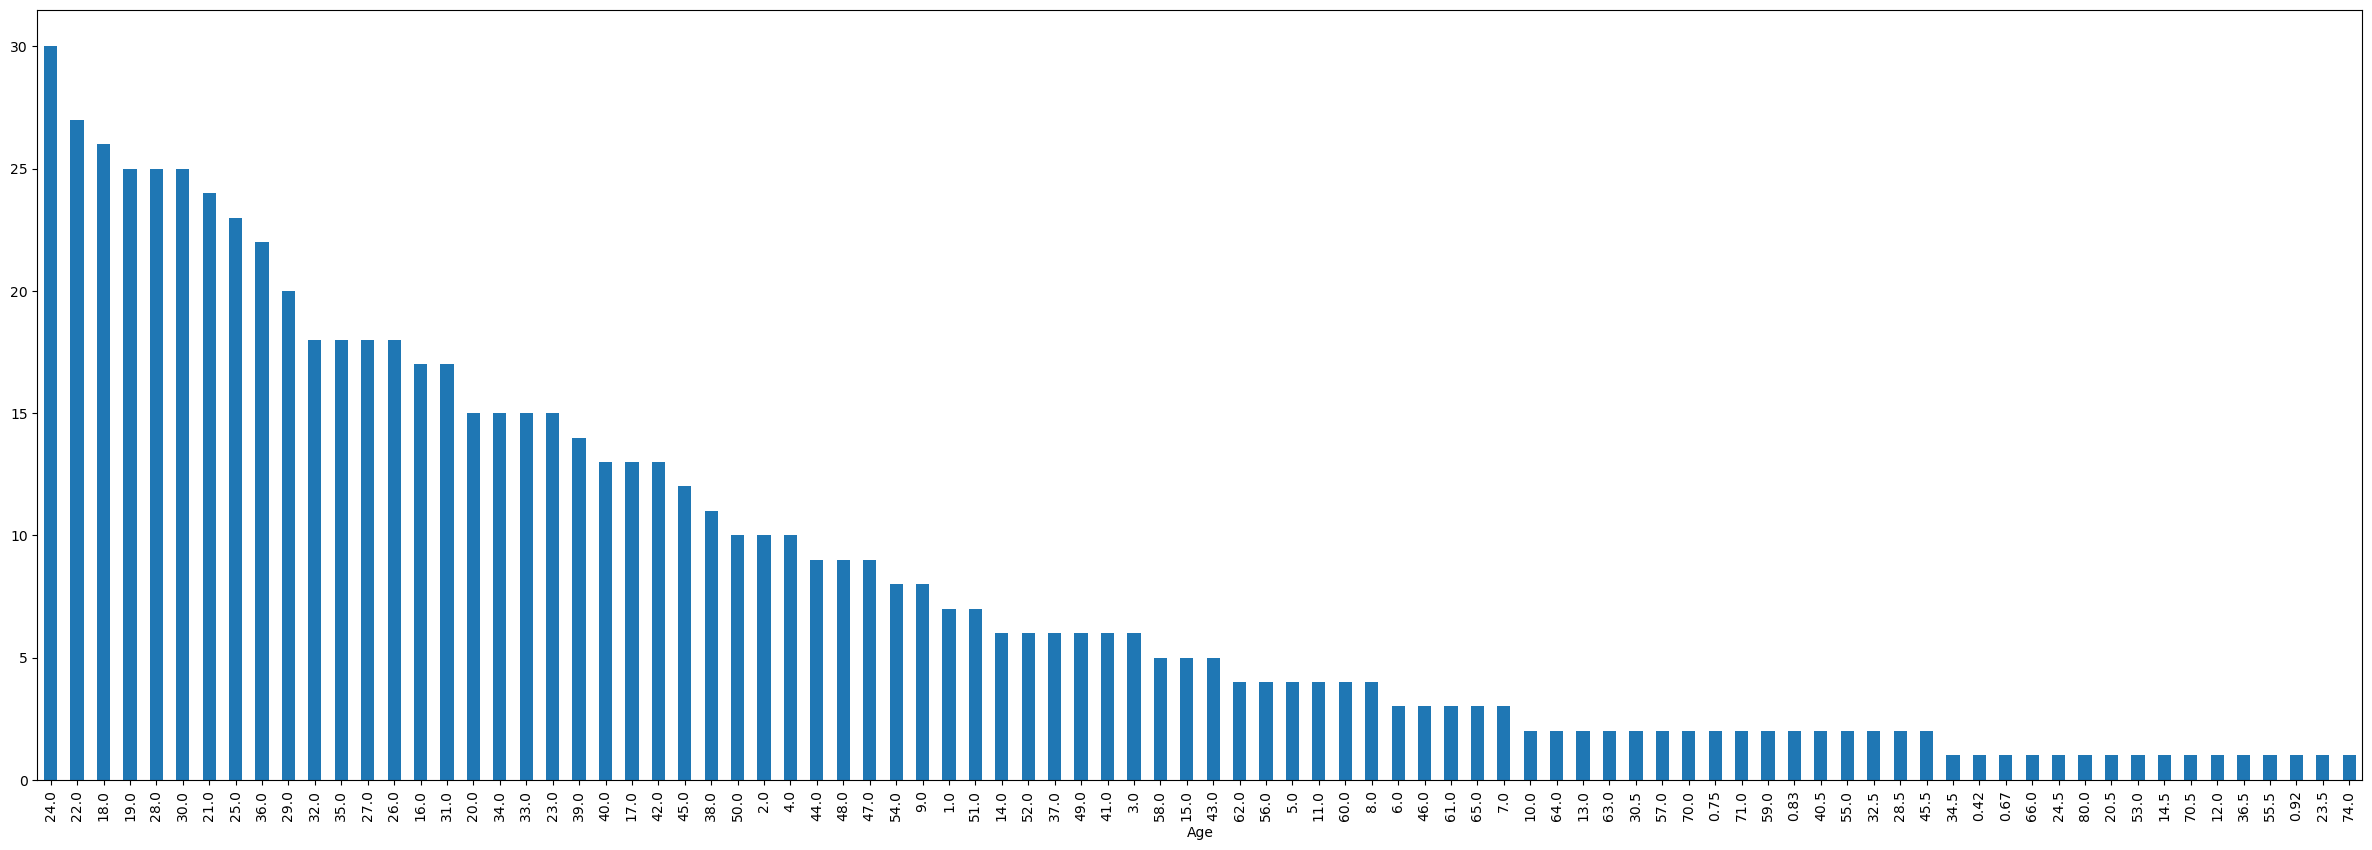

In [12]:
type(train_df['Age'].value_counts())
# 使用年龄大小以及数量来绘制柱状图，series 通过 plot 来绘制图形，不能再进一步调用下级函数，比如 plot.bar()，而是直接 plot(kind='bar')
train_df['Age'].value_counts().plot(kind='bar', figsize=(30, 10))  # value_counts 的排序是按照数量的多少来的

<Axes: ylabel='count'>

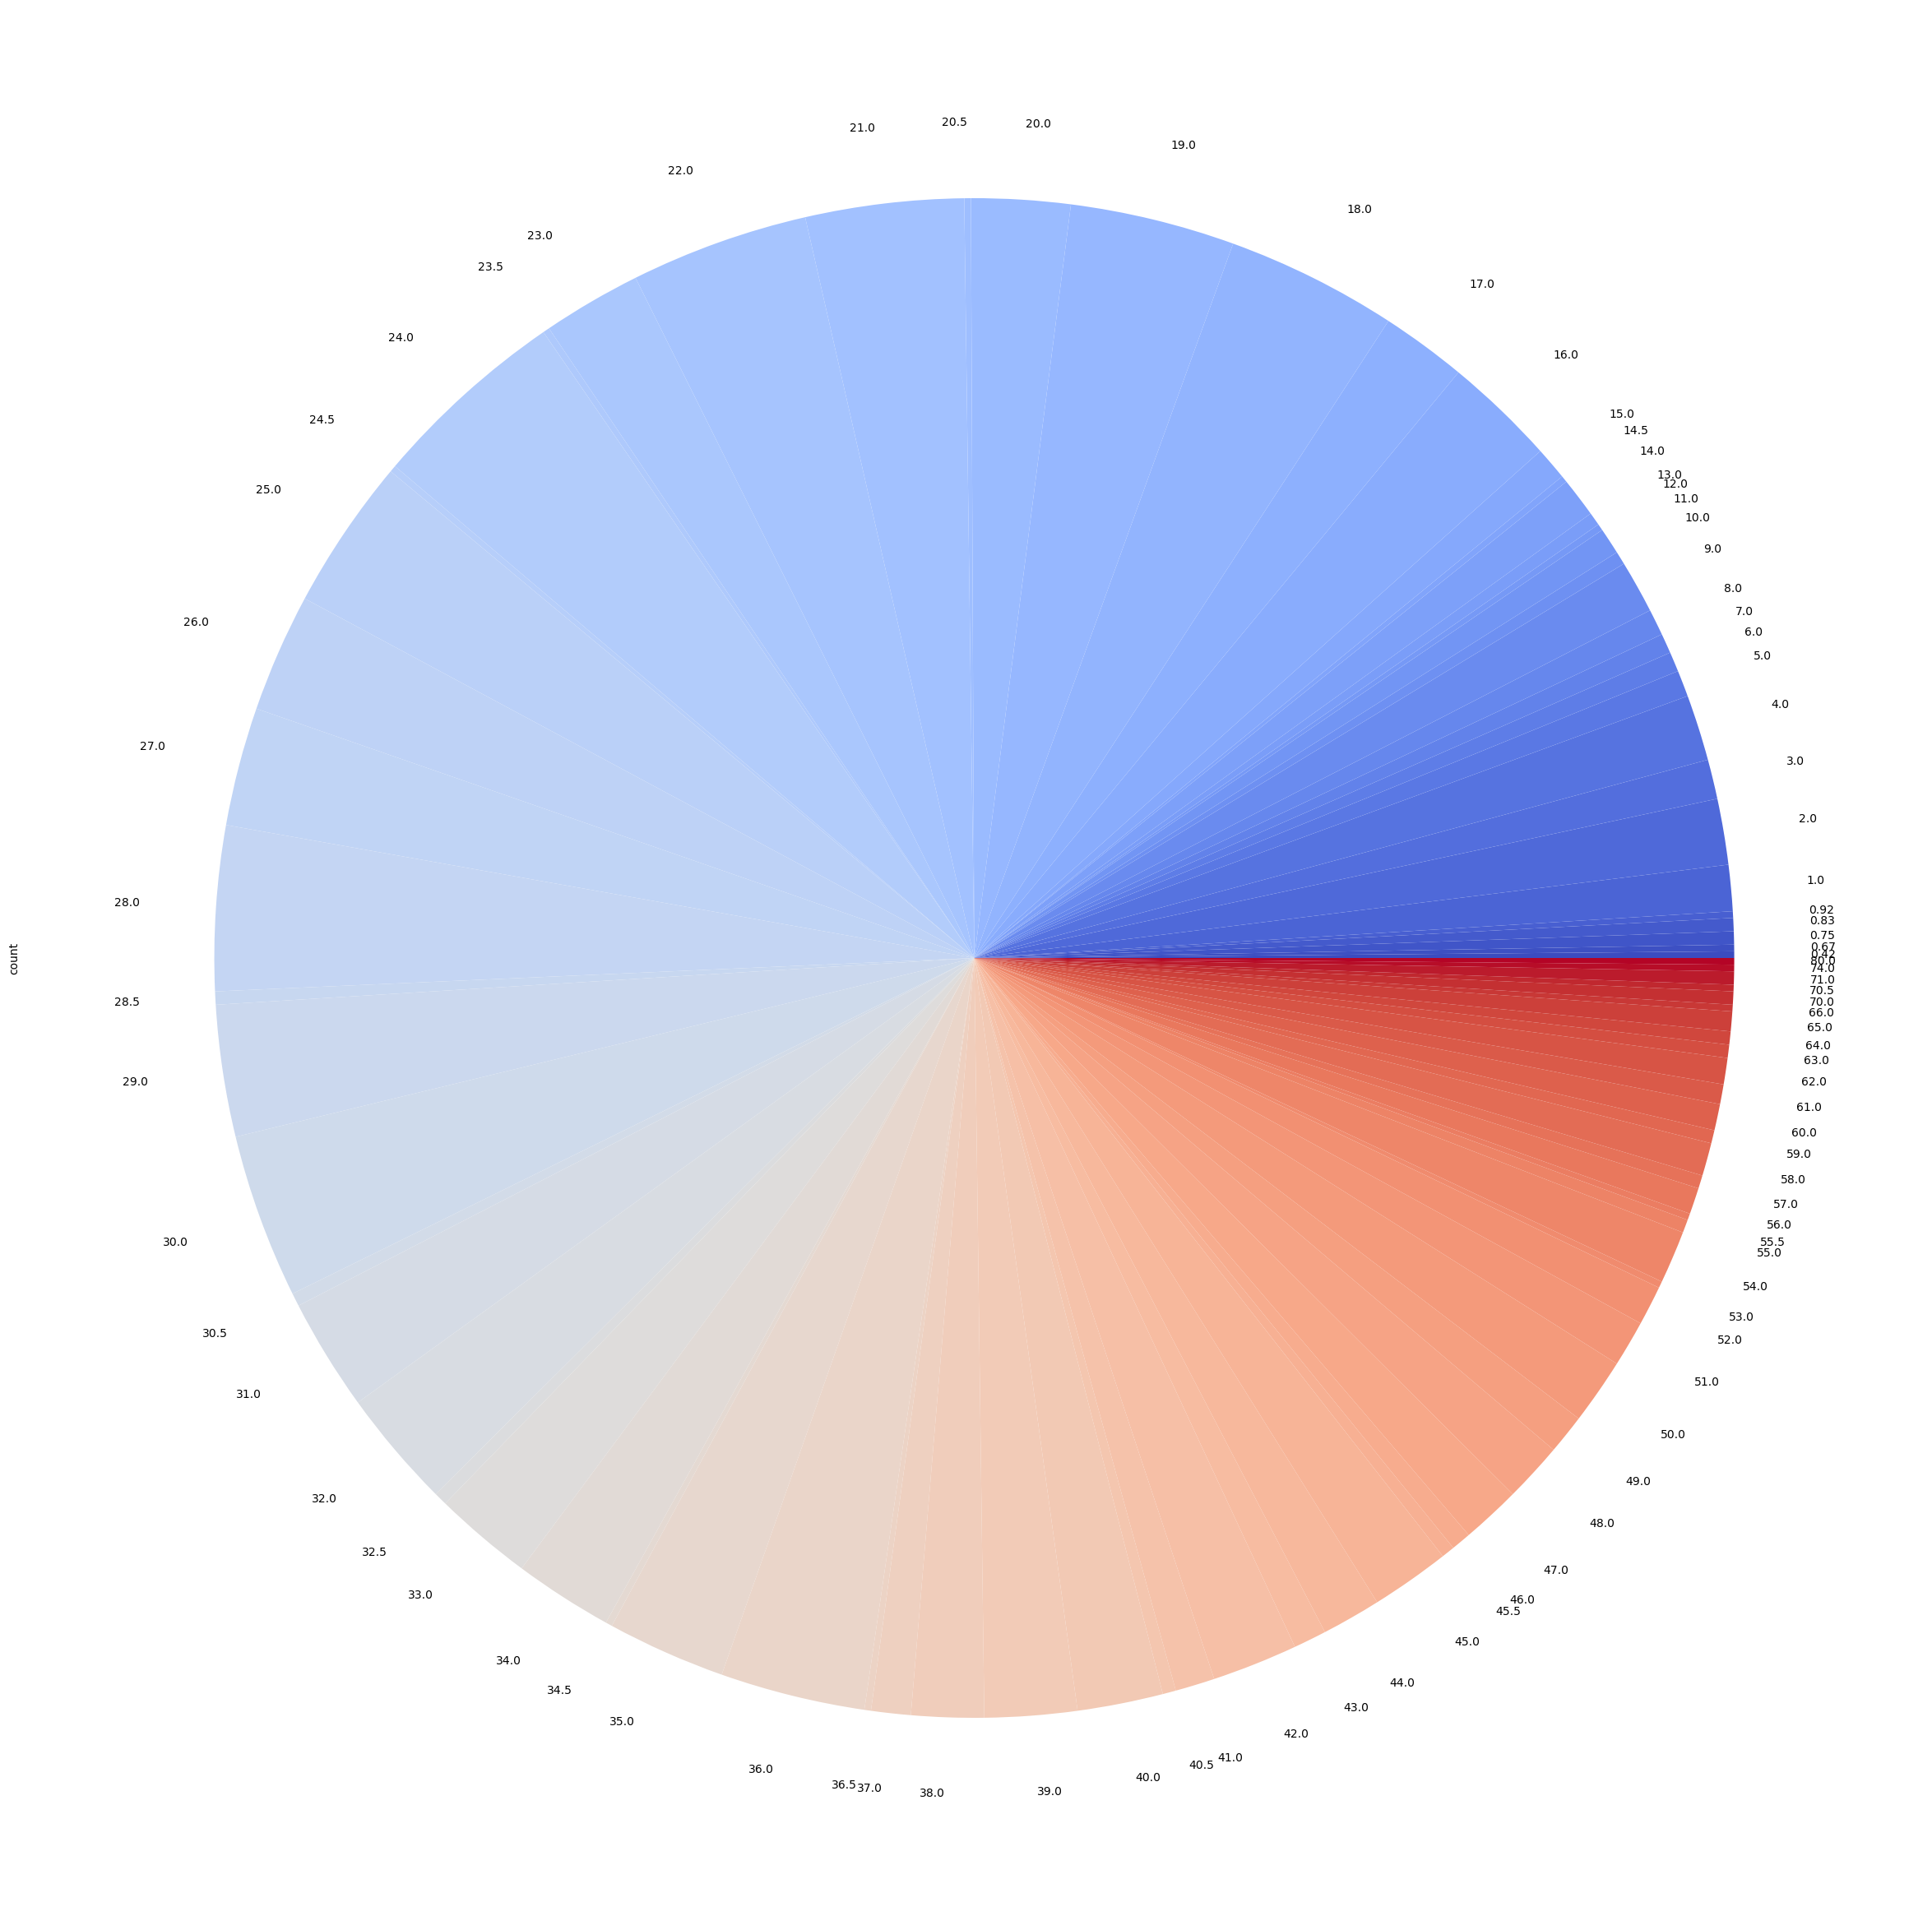

In [15]:
# 对年龄进行大小排序，再画图
train_df['Age'].value_counts().sort_index().plot(kind="pie", figsize=(30, 30), colormap='coolwarm')

<Axes: xlabel='Age'>

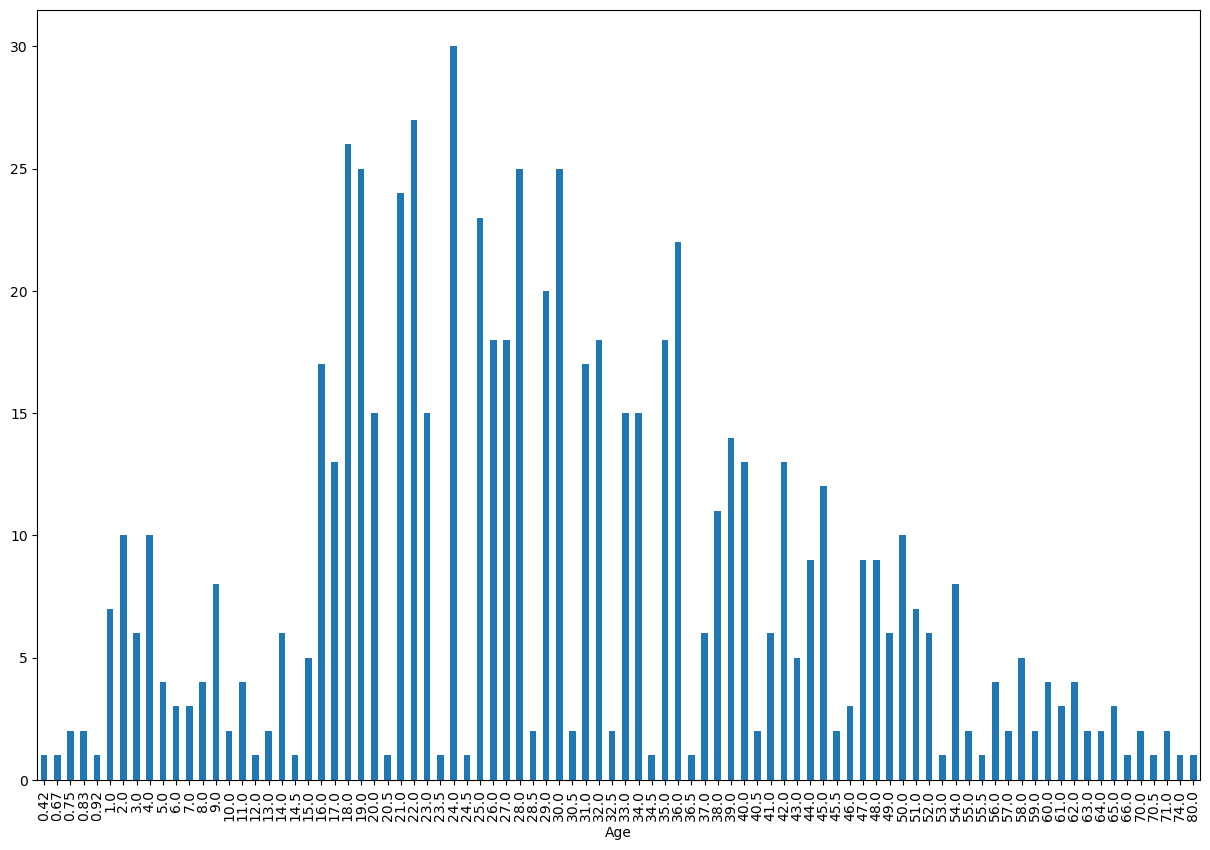

In [20]:
# 对年龄进行大小排序，再画图
train_df['Age'].value_counts().sort_index().plot(kind="bar", figsize=(15, 10))

In [21]:
#  确认类别数据分布
train_df.describe(include=['O'])  # describe(include=['O']) 只会展示那些非数字的列,显示非空个数、种类、最多的种类（top）以及最多的种类的数量（freq）

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [35]:
# 开始数据预处理阶段
# embarked 表示登船口，Cabin 表示船舱号，Ticket 表示船票号

# 
train_df['Sex'] = train_df['Sex'].map({'female':1, 'male':0}).astype(int)  # 对 Series 使用 map 可以对每个元素进行处理，map 的参数是一个字典，key 是原来的值，value 是新的值
test_df['Sex'] = test_df['Sex'].map({"female" : 1, "male" :0}).astype(int)

In [36]:
train_df['Embarked'].isnull().sum()  # isnull() 会返回一个布尔值的 Series，sum() 会对布尔值进行求和，True 会被当做 1，False 会被当做 0

2

In [37]:
# 登窗口仅有两个缺失值，此时一般使用“众数”来填充缺失值
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)  # mode() 会返回一个 Series，里面包含了众数，[0] 表示取第一个值，inplace=True 表示直接在原来的 DataFrame 上进行修改
print(train_df['Embarked'].mode()[0])
print(train_df['Embarked'].mode())
print(train_df['Embarked'].isnull().sum())

# 为什么 mode() 返回的是一个 Series，而不是一个值？
# 这是因为可能有多个众数，比如 [1, 2, 2, 3, 3, 4, 4]，这个数组的众数是 2 和 3，所以 mode() 返回的是一个 Series，里面包含了所有的众数

# 同理对 test_df['Embarked'] 进行处理
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace= True)

S
0    S
Name: Embarked, dtype: object
0


In [38]:
# 填充完缺失值后，对 Embarked 进行处理，将其转换为数字
embraked_mapping = {'S':0, 'C':1, 'Q':2}
train_df['Embarked'] = train_df['Embarked'].map(embraked_mapping).astype(int)
test_df['Embarked'] = test_df['Embarked'].map(embraked_mapping).astype(int)
print(test_df.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         2  
1  47.0      1      0   363272   7.0000   NaN         0  
2  62.0      0      0   240276   9.6875   NaN         2  
3  27.0      0      0   315154   8.6625   NaN         0  
4  22.0      1      1  3101298  12.2875   NaN         0  


In [39]:
# 对特征进行筛选
# 1. 删除不需要的特征： 由于 ticket 含大量重复值，且 ticket 是随机号码，删除；Cabin 缺失值太多，删除；
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)  # axis=1 表示删除列，axis=0 表示删除行; 列表里的元素是要删除的列/行的名字
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

177
<class 'seaborn.axisgrid.FacetGrid'>


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


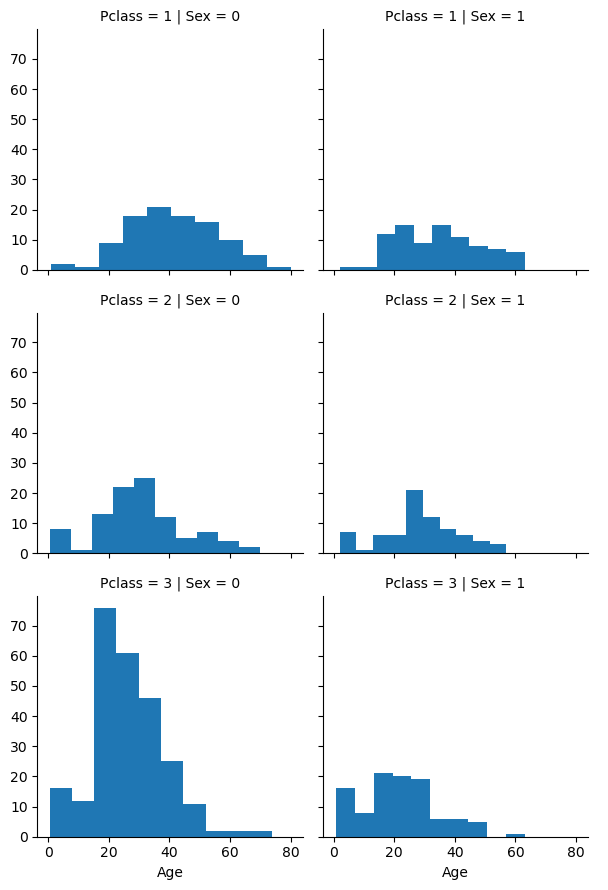

In [47]:
# 补充年龄缺失值
print(train_df['Age'].isnull().sum())

# 年龄与其他特征的关系，它与 pclass 和 sex 有关，因此可以用不同 pclass 和不同性别族群的中位数来对 Age 进行填补
from matplotlib import pyplot as plt
import seaborn as sns

distribution = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex')
print(type(distribution))
distribution.map(plt.hist, 'Age', bins = 10)
distribution.add_legend()

In [50]:
for df in [train_df, test_df]:
    for i in range(0, 2):
        for j in range(0 , 3):
            df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), 'Age']  = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
                # df[(df['Sex'] == i) & (df['Pclass'] == j+1)] 是一个 DataFrame，它的 Age 列是一个 Series，所以可以直接使用 median() 函数
                # 而等式左边的 df.loc[xxx, xx] 指定的是一个值，我们需要填充的位置对应的值
    df['Age'] = df['Age'].astype(int)


print(train_df['Age'].isnull().sum())

0


In [53]:
# 处理 fare 栏位,为什么不用众数用中位数？
# 这是因为 fare 是一个连续值，而不是离散值，所以使用中位数更合适
# 而前面的 Embarked 是离散值，所以使用众数更合适
print(test_df['Fare'].isnull().sum())
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

1


In [54]:
# 最后，使用 info() 检查下两个数据是否处理完毕
train_df.info()

print()

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex     

In [57]:
## 开始数据探索，运用一些统计学或视觉图标的方式帮助读者进一步认识数据

print(train_df.select_dtypes(include=['int64', 'float64']).corr())

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.039529 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.060291 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.414682  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.104584  0.114631   
Age             0.039529 -0.060291 -0.414682 -0.104584  1.000000 -0.250248   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.250248  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.175708  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.123250  0.159651   
Embarked       -0.030467  0.106811  0.045702  0.116569 -0.059221 -0.059961   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030467  
Survived     0.081629  0.257307  0.106811  
Pclass       0.018443 -0.549500  0.045702  
Sex          0.245489  0.182333  0.116569  

In [63]:
# 使用数据透视表来观察 sibSp 与 Parch 这两个栏位分别与 Survived 之间的关系
print(pd.pivot_table(train_df[['Survived','SibSp']],index = ['SibSp'], aggfunc=np.mean)) # aggfunc=np.mean 表示使用平均值来进行聚合

print()

print(pd.pivot_table(train_df[['Survived','Parch']],index = ['Parch'], aggfunc=np.mean))


       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000

       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_23031/2538301014.py:2: FutureWarning: The provided callable <function mean at 0x106884700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.pivot_table(train_df[['Survived','SibSp']],index = ['SibSp'], aggfunc=np.mean))
/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_23031/2538301014.py:6: FutureWarning: The provided callable <function mean at 0x106884700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.pivot_table(train_df[['Survived','Parch']],index = ['Parch'], aggfunc=np.mean))


In [67]:
# 继续使用数据透视表来观察 pclass、Sex、Embarked 与 Survived 之间的关系
print(pd.pivot_table(train_df[['Survived','Pclass']], index=['Pclass'], aggfunc=np.mean))

print(pd.pivot_table(train_df[['Survived', 'Sex']], index=['Sex'], aggfunc=np.mean))

print(pd.pivot_table(train_df[['Survived', 'Embarked']], index=['Embarked'], aggfunc=np.mean))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
     Survived
Sex          
0    0.188908
1    0.742038
          Survived
Embarked          
0         0.339009
1         0.553571
2         0.389610


/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_23031/1291032699.py:2: FutureWarning: The provided callable <function mean at 0x106884700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.pivot_table(train_df[['Survived','Pclass']], index=['Pclass'], aggfunc=np.mean))
/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_23031/1291032699.py:4: FutureWarning: The provided callable <function mean at 0x106884700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.pivot_table(train_df[['Survived', 'Sex']], index=['Sex'], aggfunc=np.mean))
/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_23031/1291032699.py:6: FutureWarning: The provided callable <function mean at 0x106884700> is currently using Da

In [ ]:
# 从上面观察到 Pclass = 1 和 survived 之间有显著的相关性，建议在分类模型中包含此特征值
# 性别为女性的乘客幸存率更高，表示获救的大部分是女女性族群
# 此外，从 Embarked = 1 的乘客幸存率更高，表示获救的大部分是从 C 港口登船的乘客

In [68]:
# 从前面统计数据看出，不同性别和年龄层的生存率差异很大，因此可以借由人名称呼来检视是否有其他的相关性
for df in [train_df, test_df]:
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)  # expand=False 表示返回一个 Series，而不是 DataFrame;extract() 函数会根据正则表达式来提取字符串中的内容

for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace(['Mme'], 'Mrs')

In [69]:
new_train_df = train_df.copy()
new_test_df = test_df.copy()
for df in [new_train_df, new_test_df]:
    df['Title'] = df['Title'].astype('category').cat.codes

print(new_train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()) # as_index=False 表示不要将 Title 作为 index,而是作为一列

print(new_train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).count())


   Title  Survived
0      0  0.575000
1      1  0.702703
2      2  0.156673
3      3  0.793651
4      4  0.347826
   Title  Survived
0      0        40
1      1       185
2      2       517
3      3       126
4      4        23


In [70]:
for df in [train_df, test_df]:
    df['Title'] = df['Title'].astype('category').cat.codes

In [71]:
# 将 SibSp 和 Parch 合并为一个新的特征 FamilySize，并统计不同家庭人员数量的生存率
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1 # +1 表示加上自己
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] + 1

print(pd.pivot_table(train_df[['Survived', 'Family']], index = ['Family'], aggfunc=np.mean)) # train_df[['Survived', 'Family']] 是一个 DataFrame

        Survived
Family          
1       0.303538
2       0.552795
3       0.578431
4       0.724138
5       0.200000
6       0.136364
7       0.333333
8       0.000000
11      0.000000


/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_23031/1794611570.py:5: FutureWarning: The provided callable <function mean at 0x106884700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.pivot_table(train_df[['Survived', 'Family']], index = ['Family'], aggfunc=np.mean))


In [72]:
# 统计一下独自旅行的人的生存率
train_df['single'] = 0
train_df.loc[train_df['Family'] == 1, 'single'] = 1  # loc 的第一个参数是行，可以传入一个布尔值的 Series，表示选取满足条件的行；第二个参数是列，可以传入一个列表名，表示选取指定的列

test_df['single'] = 0
test_df.loc[test_df['Family'] == 1, 'single'] = 1

print(pd.pivot_table(train_df[['Survived', 'single']], index=['single'], aggfunc=np.mean))

# 可以看出独自旅行的人的生存率较低

        Survived
single          
0       0.505650
1       0.303538


/var/folders/mr/d7lt6chd66jgt7d560rj0sp00000gn/T/ipykernel_23031/1141183171.py:8: FutureWarning: The provided callable <function mean at 0x106884700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.pivot_table(train_df[['Survived', 'single']], index=['single'], aggfunc=np.mean))


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


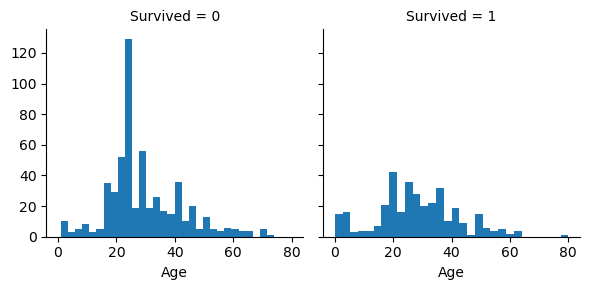

In [73]:
# 接下来通过视觉图表的方式进行观察。
# 首先，统计不同年龄层的幸存者数量
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 30)

# 从结果来看：
# 1. 较年轻的族群生存率高
# 2. 年纪越大，生存率越低
# 3. 超过 80 岁的老人全部生存


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


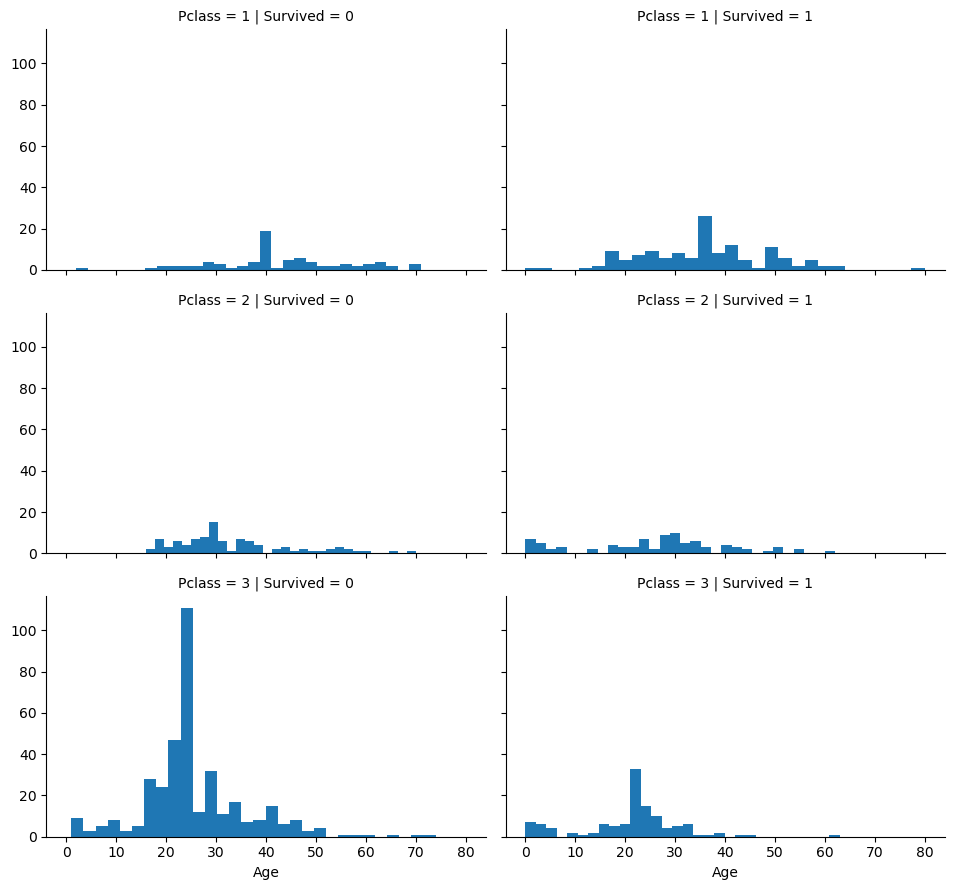

In [75]:
# 看看 不同年龄层，和不同 Pclass 的生存率

g = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', aspect = 1.6)
g.map(plt.hist, 'Age', alpha = 1 , bins = 30) # alpha 表示透明度
g.add_legend()

# 1. 小孩大部分分布在 Pclass =1，且生存率高
# 2. 大部分人在 pclass = 3，且生存率低
# 3. 在 Pclass = 1 的人生存率较高

In [78]:
## 开始特征工程
# 在这个阶段，对每一列数据的特性作处理
# 目的：将有意义的栏位放大， 将无意义的栏位缩小，进而提升数据的可分性

# name 和 passengerId 是无意义的栏位，对分类任务不具备区别性
# Parch、Sibsp 、Family 都有与生存率没有相关性的值，对分类任务不具备区别性
# 将它们删除
train_df = train_df.drop(['Name', 'PassengerId', 'Parch', 'SibSp', 'Family'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId', 'Parch', 'SibSp', 'Family'], axis=1)

In [76]:
# 接下来，提取不同年龄层，将年龄层分成不同的范围，将连续型数值转换为离散型数值
for dataset in [train_df, test_df]:
    dataset.loc[dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 45), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[dataset['Age'] > 60, 'Age'] = 4

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,single
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,0,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,1,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,0,3,2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,0,2,1,1


In [81]:
# 对 Fare 进行处理，将连续型数值转换为离散型数值
# 按照四分位数来划分    
for dataset in [train_df, test_df]:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91 ) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454 ) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31 ), 'Fare'] = 3

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,single
0,0,3,0,1,0.0,0,2,0
1,1,1,1,2,3.0,1,3,0
2,1,3,1,1,1.0,0,1,1
3,1,1,1,2,3.0,0,3,0
4,0,3,0,2,1.0,0,2,1
5,0,3,0,1,1.0,2,2,1
6,0,1,0,3,3.0,0,2,1
7,0,3,0,0,2.0,0,0,0
8,1,3,1,1,1.0,0,3,0
9,1,2,1,0,2.0,1,3,0
